# Project: Investigate a Dataset (TMDB - Movies Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [2]:
# Importing Data set and Checking the data head

df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# Checking the Information of the Dataset and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# checking shape for number of rows and columns

df.shape

(10866, 21)

In [5]:
# Getting to know the range and distributionof numerical datas 

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


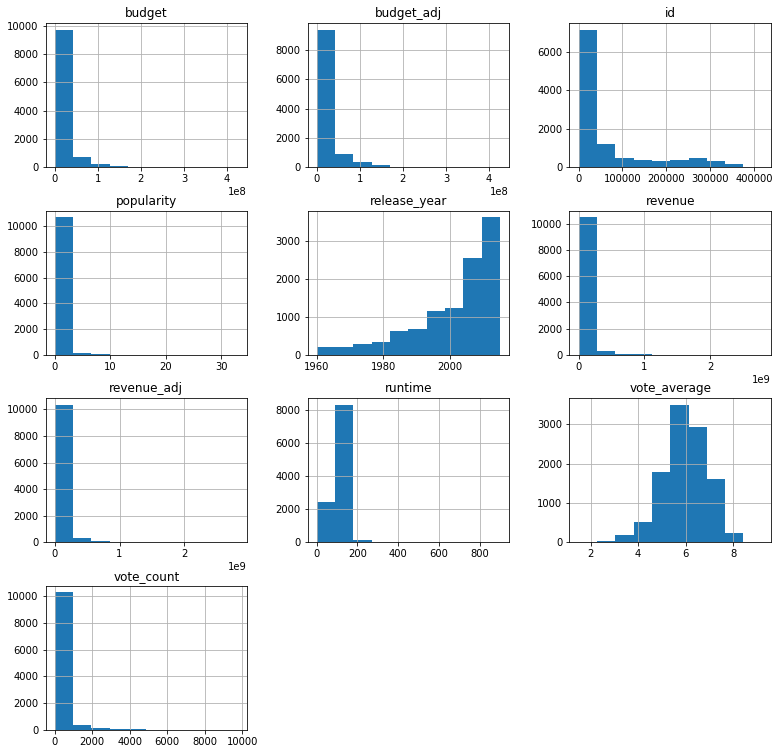

In [6]:
# Getting to know the range and distributionof numerical datas

df.hist(figsize = (13,13));

### Data Cleaning

### Step 1 - Checking for missing values and removing the NaN values

> Looking at the data info, following columns seems to have missing values -
1. genres, 
2. homepage, 
3. cast, 
4. tagline, 
5. keywords, 
6. overview,
7. production companies. 

> For our analysis we will not use homepage, tagline,overview, so we will not replace null values, but later drop this columns from our dataframe.

### We will check how many null values are there in Genre, cast, production companies, keywords columns

In [7]:
# Checking number of rows having "Genres" as Null

print ('Number of null values in genre - ',sum(df['genres'].isnull()))
print ('Number of null values in prodcution companies - ',sum(df['production_companies'].isnull()))
print ('Number of null values in cast - ',sum(df['cast'].isnull()))
print ('Number of null values in keywords - ',sum(df['keywords'].isnull()))

Number of null values in genre -  23
Number of null values in prodcution companies -  1030
Number of null values in cast -  76
Number of null values in keywords -  1493


> Observing the missing values, looks like dropping production companies and keywords will drop large set of data, so we will not drop them. Also sonce they are not numeric columns, we canno to replace them also. So wee will keep them as-is for our analysis purpose. 
we can drop the data where genre and cast are missing for cleaning the data



In [8]:
# Dropping NaN values from Genres

df.dropna(subset=['genres'], how='all', inplace=True)
df.dropna(subset=['cast'], how='all', inplace=True)

In [9]:
# Re-Checking  "Genres" and 'cast' has no null values

print ('Number of null values in genre - ',sum(df['genres'].isnull()))
print ('Number of null values in cast - ',sum(df['cast'].isnull()))


Number of null values in genre -  0
Number of null values in cast -  0


### Step 2 - Checking for 'Zero' values and replacing the 'Zero' values with Nan to remove them from dataset

> Looking at df.describe, its observed that there are many data that contian '0' values which will not help in working with our analysis. So the Zero has to be replaced with NaN and then we can drop the rows that contains NaN

In [10]:
df['budget'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0,np.NAN, inplace = True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['revenue_adj'].replace(0, np.NAN, inplace=True)

In [11]:
print ('Number of null values in budget - ',sum(df['budget'].isnull()))
print ('Number of null values in revenue - ',sum(df['revenue'].isnull()))
print ('Number of null values in runtime - ',sum(df['runtime'].isnull()))
print ('Number of null values in Adjusted budget - ',sum(df['budget_adj'].isnull()))
print ('Number of null values in Adjusted revenue - ',sum(df['revenue_adj'].isnull()))

Number of null values in budget -  5610
Number of null values in revenue -  5923
Number of null values in runtime -  30
Number of null values in Adjusted budget -  5610
Number of null values in Adjusted revenue -  5923


> Observing above dataset for null values - dropping budget and revenue, would result in dropping of majority of dataset, which would result in incorrect analysis , so we will keep the revnue and budget data as-is an just ignore the null values as it will not impact the mean and median. 
we will drop the data where runtime is null.

In [12]:
df['runtime'].dropna(axis = 0, inplace = True)

### Step 3 - Splitting the columns seperated by "|" and then joining them back to original dataframe

> Looking at df.head, its observed that there are many data seems to contain several values, which are seperated by an "|". We will seperate this data in seperate columns and then delete the original columns. The columns in scope for this are Genres, Keywords, Director, Production Companies, and Cast

> This splitting is just in case we want to use this data seperatly

In [13]:
df_genre = df.genres.str.split('|', expand=True).rename(columns = lambda x: "Genre_{}".format(x+1))

df_genre.head(2)

,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None


In [14]:
df_keyword = df.keywords.str.split('|', expand=True).rename(columns = lambda x: "Keyword_{}".format(x+1))

df_keyword.head(2)

,Keyword_1,Keyword_2,Keyword_3,Keyword_4,Keyword_5
0,monster,dna,tyrannosaurus rex,velociraptor,island
1,future,chase,post-apocalyptic,dystopia,australia


In [15]:
df_production = df.production_companies.str.split('|', expand=True).rename(columns = lambda x: "Production_{}".format(x+1))

df_production.head(2)

,Production_1,Production_2,Production_3,Production_4,Production_5
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None


In [16]:
df_cast = df.cast.str.split('|', expand=True).rename(columns = lambda x: "Cast_{}".format(x+1))

df_cast.head(2)

,Cast_1,Cast_2,Cast_3,Cast_4,Cast_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman


In [17]:
df = df.join([df_cast, df_genre, df_keyword, df_production])

In [18]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Keyword_1,Keyword_2,Keyword_3,Keyword_4,Keyword_5,Production_1,Production_2,Production_3,Production_4,Production_5
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,monster,dna,tyrannosaurus rex,velociraptor,island,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,future,chase,post-apocalyptic,dystopia,australia,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None


### Step 3 -  Checking for Duplicate Rows and Deleting them

In [19]:
sum(df.duplicated())

1

In [20]:
# there is only one row that is duplicate , so we will remove the duplicate row
df = df.drop_duplicates()

### Step 4 - Checking for columns data formats are as per the colmun requirement

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10767 entries, 0 to 10865
Data columns (total 41 columns):
id                      10767 non-null int64
imdb_id                 10759 non-null object
popularity              10767 non-null float64
budget                  5157 non-null float64
revenue                 4844 non-null float64
original_title          10767 non-null object
cast                    10767 non-null object
homepage                2903 non-null object
director                10731 non-null object
tagline                 8010 non-null object
keywords                9322 non-null object
overview                10764 non-null object
runtime                 10737 non-null float64
genres                  10767 non-null object
production_companies    9791 non-null object
release_date            10767 non-null object
vote_count              10767 non-null int64
vote_average            10767 non-null float64
release_year            10767 non-null int64
budget_adj           

> Looks like the release Date column is not in correct format, so we will convert it in date format 

In [22]:
df['release_date'].head(2)

0     6/9/15
1    5/13/15
Name: release_date, dtype: object

In [23]:
from datetime import timedelta, date
df['release_date'] = pd.to_datetime(df['release_date'])
future = df['release_date'] > date(year=2050,month=1,day=1)
df.loc[future, 'release_date'] -= timedelta(days=365.25*100)

C:\Users\abhij\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df['release_date'].tail()

10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Name: release_date, dtype: datetime64[ns]

### Step 5 -  Resetting the Index 

In [25]:
df = df.reset_index()

In [26]:
df.shape

(10767, 42)

### Stepping 6 - Dropping Columns that are not going to be used for analysis

In [27]:
col = ['imdb_id', 'homepage', 'tagline', 'overview']

df.drop(col, axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 - Calculating the Average Profit of the each movie over year on year

In [28]:
# Calculating Profit & Adjusted Profit and add new colomn 'profit' and profit_adj

df['profit'] = df['revenue'] - df['budget']
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']

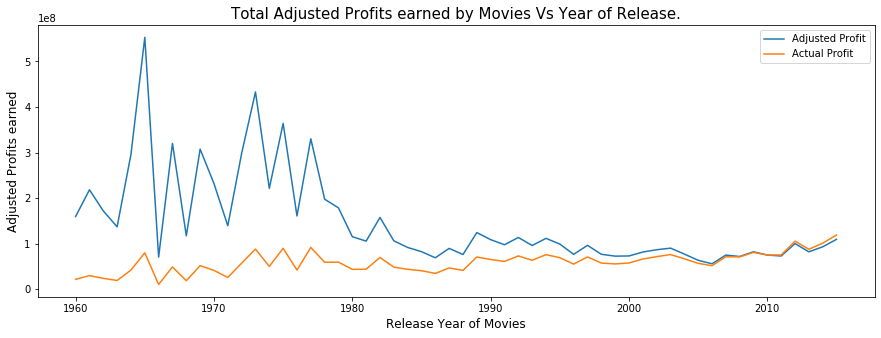

In [29]:
#figure size(width, height)
plt.figure(figsize=(15,5))

#on x-axis
plt.xlabel('Release Year of Movies', fontsize = 12)
#on y-axis
plt.ylabel('Adjusted Profits earned', fontsize = 12)
#title of the line plot
plt.title('Total Adjusted Profits earned by Movies Vs Year of Release.', fontsize = 15)

#plotting the graph
plt.plot(df.groupby('release_year')['profit_adj'].mean(), label='Adjusted Profit')
plt.plot(df.groupby('release_year')['profit'].mean(), label='Actual Profit')
plt.legend()

#displaying the line plot
plt.show()

### Conclusion - 
>There is intresting observation  - the average actual profit amount of movie industry  has increasing trend, but while if we look data based on adjusted value for inflation, the average profitability of movie industry has decreased drastically.
The monetary profitability of the movies has been increasing  year on year, but if we compare to the adjusted value of the profit for inflation, it seems that movies released during 1965 to 1980, many movies has major profit that havent beed acheived for recently released movies.

### Research Question 2   - Movie Popularity Trend over Years

In [30]:
print("The average profit of all movies is :- ",df['profit'].mean())
print("The average budget of all movies is :- ",df['budget'].mean())

The average profit of all movies is :-  70549394.24051948
The average budget of all movies is :-  30806768.81365135


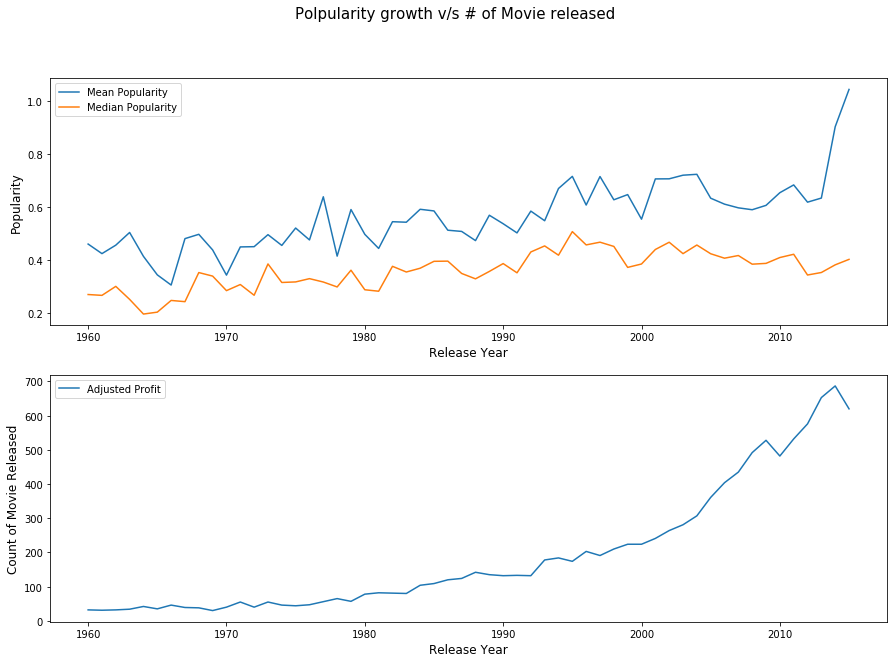

In [31]:
# Plotting the graph for comparing the yearly popularity growth and the number of movies released yearly

#Setting the Subplot and figure size
fig, (plt1, plt2) = plt.subplots(2, figsize = (15,10))
figsize = (10,10)

fig.suptitle('Polpularity growth v/s # of Movie released', fontsize = 15)

# Creating the plot 1 - mean and median popluatiry growth over years
plt1.plot(df.groupby('release_year')['popularity'].mean(), label='Mean Popularity')
plt1.plot(df.groupby('release_year')['popularity'].median(), label='Median Popularity')
plt1.set_xlabel('Release Year', fontsize = 12 )
plt1.set_ylabel('Popularity', fontsize = 12 )
plt1.legend()

# Creating the plot 2 - number of movies released over years
plt2.plot(df.groupby('release_year')['id'].count(), label='Adjusted Profit')
plt2.set_xlabel('Release Year', fontsize = 12 )
plt2.set_ylabel('Count of Movie Released', fontsize = 12)
plt2.legend()


plt.show()

### Conclusion - 

> 1. There is sudden spike in popularity of movies after 2014. so people have loved recently released more, or the more people have voted positively for movies released.
> 2. Though number of movies releases has increased 7 times over the course of years, the popularity has remain more or less between 0.3 to 0.5, this indicates that the ratio of popular and non popular has remained same but factual number of popular movies has increased

### Research Question 3   - Average Movie Runtime Trend over Years

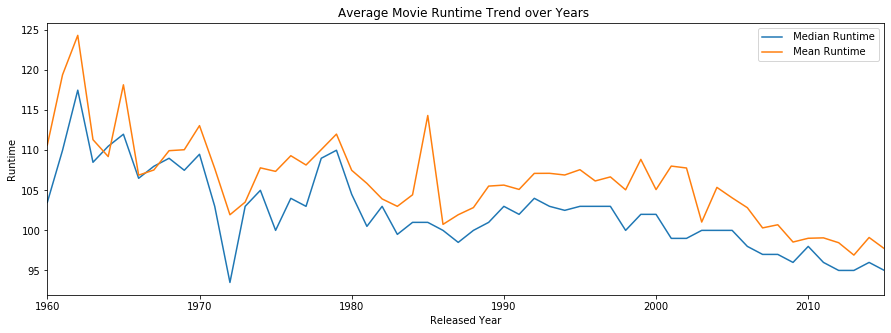

In [32]:
ax1 = df.groupby('release_year')['runtime'].median().plot(figsize = (15,5), label =' Median Runtime', title = 'Average Movie Runtime Trend over Years ')
ax2 = df.groupby('release_year')['runtime'].mean().plot(figsize = (15,5), label =' Mean Runtime')
ax1.set_xlabel('Released Year')
ax1.set_ylabel("Runtime")
ax1.legend()
plt.show()

### Conclusion

> 1. The average runtime has been in decreasing trend, that means more number of movies are releases with shorter runtime 
> 2. Overall there is trend of releasing shorter length movies

### Research Question 4   - Budget vs Revenue vs Popularity


In [33]:
# Grouping function - creating a function to create categorical column data to use it with multiple analysis

def grouping(data ,column_name):
# find 25%, 50%, 75%, max and min values
    min_value = data[column_name].min()
    first_quantile = data[column_name].describe()[4]
    second_quantile = data[column_name].describe()[5]
    third_quantile = data[column_name].describe()[6]
    max_value = data[column_name].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
# Creates column_levels column
    name = '{}_levels'.format(column_name)
    data[name] = pd.cut(data[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return data

In [34]:
df_budget = grouping(df, 'budget')
df_revenue = grouping(df, 'revenue')

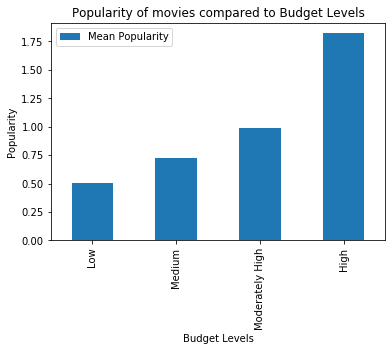

In [35]:
#Comparing Budget of movies with Popularity

chart1 = df_budget.groupby('budget_levels')['popularity'].mean().plot(kind = 'bar', label = 'Mean Popularity', title = 'Popularity of movies compared to Budget Levels')
chart1.set_xlabel('Budget Levels')
chart1.set_ylabel('Popularity')
chart1.legend()
plt.show()

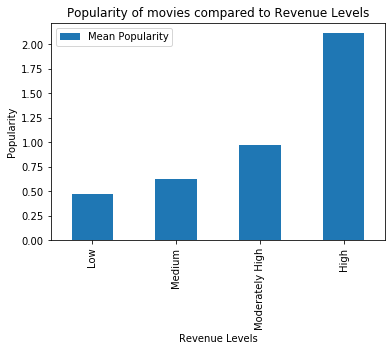

In [36]:
#Comparing Revenue of movies with popularity

chart2 = df_revenue.groupby('revenue_levels')['popularity'].mean().plot(kind = 'bar', label = 'Mean Popularity', title = 'Popularity of movies compared to Revenue Levels');
chart2.set_xlabel('Revenue Levels')
chart2.set_ylabel('Popularity')
chart2.legend()
plt.show()

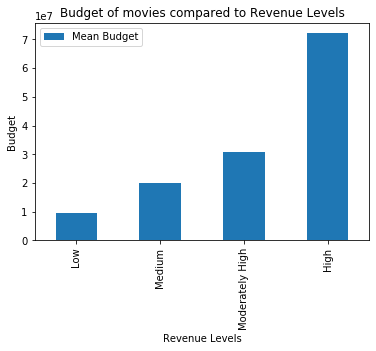

In [37]:
#Comparing Revenue of movies with Budget

chart3 =df_revenue.groupby('revenue_levels')['budget'].mean().plot(kind = 'bar',label = 'Mean Budget', title = 'Budget of movies compared to Revenue Levels' );
chart3.set_xlabel('Revenue Levels')
chart3.set_ylabel('Budget')
chart3.legend()
plt.show()

### Conclusion

> 1. Comparing Budget of movies with Popularity - We can conclude that higher the budget of movies , higher is the popularity
> 2. Comparing Revenue of movies with popularity - We can conclude that higher the popularity, higher are the revnues of the movies
> 3. Comparing Revenue of movies with Budget  - We can conclude that higher the budget of the movies , revenue generated by movies with higher budget is also higher.
> 4.


### Research Question 5 - Comparing Runtime with Popularity

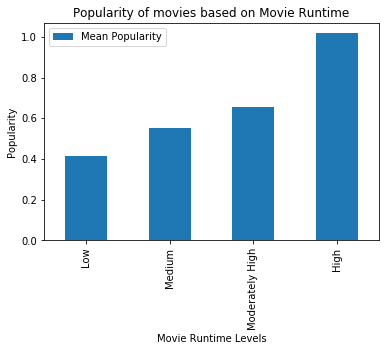

In [38]:
df_runtime  = grouping(df, 'runtime')

ax = df_runtime.groupby('runtime_levels')['popularity'].mean().plot(kind = 'bar', label = 'Mean Popularity',title = 'Popularity of movies based on Movie Runtime')
ax.set_xlabel('Movie Runtime Levels')
ax.set_ylabel("Popularity")
ax.legend()
plt.show()

### Conclusion 

> Movies with higher runtime are more popular among the crowd than compared to movies with shorter runtime

### Research Question 6 - Top 5 Genres released over the period of time

In [39]:
# Creating a function to split the columns seperated by '|' and then group them categorically to find top 10 values

def top_10(data, column):
    data_split = data[column].str.cat(sep = '|')
    data_split = pd.Series(data_split.split('|'))
    return data_split.value_counts().sort_values(ascending = False).head(10).plot(kind = 'barh', figsize =(10,5), title = ('Count of Top 10 {}'.format(column)))
def bottom_10(data, column):
    data_split = data[column].str.cat(sep = '|')
    data_split = pd.Series(data_split.split('|'))
    return data_split.value_counts().sort_values(ascending = False).tail(10).plot(kind = 'barh', figsize =(10,5), title = ('Count of Bottom 10 {}'.format(column)))

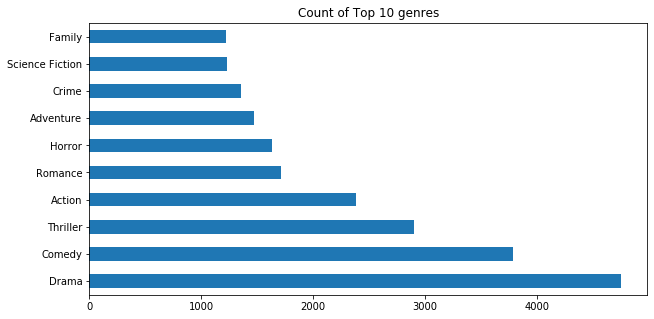

In [40]:
top_10(df,'genres');

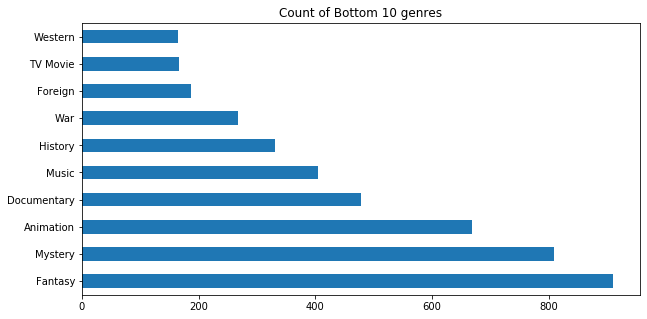

In [41]:
bottom_10(df,'genres');

### Conclusion

> 1. The top 5 released genres are Drama, Comedy, Thriller, Action, Romance
> 2. The least 5 released genres are History, War, Forign, TV movie, Western

### Research Question 7 - Top 10 casted actors over the period of time

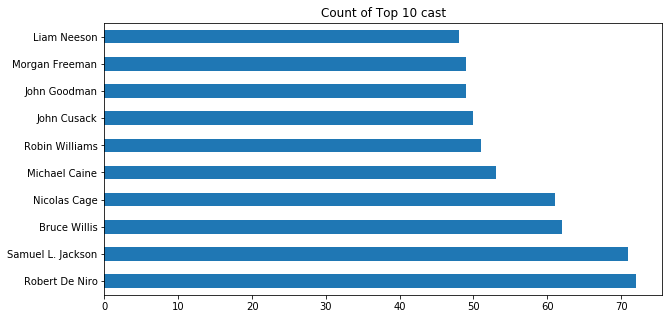

In [42]:
# suiing the function  created above for identifying top 10 to find the most casted actors

top_10(df,'cast');

### Conclusion

> Robert De Niro is the most over casted actor in maximum movies followed by Samuel l Jackson
> Finding the least casted movie actor would not make sense as there are many actory that have been casted only in 1 movie.

### Research Question 8 - Top 10 Production companies making movies

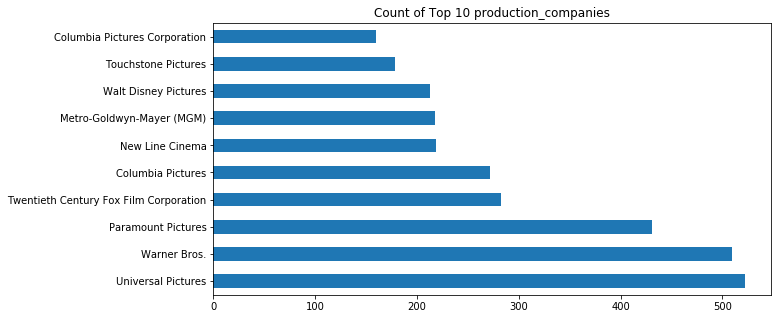

In [43]:
top_10(df,'production_companies');

### Conclusion

> Universal Studios have produced maximum number of movies over the periond with more tahn 500 movies folowed by Warner Bros

### Limitations and Challenges- 

1. The calculation for Revenue, Budget and Profit is done with the data that was available with many of the data values zero and thus we have ignored those data by adding nan so not to impact the mean.The analysis was done considering the data where 30% of Budget and revenue were unknown, so the actual mean and Median would be different when provided with all values for this field.
2. Also there are no unit of currency for Revenue, Budget, so assumption was made looking at data that they are of same unit and scale. This might have resulted in not so accurate comparision if they are in differnt currency unit or different scale.
3. The data for Genre, Cast Production companies was seperated by '|' and also the order is not split is not consistent, So splitting them in multiple columns and then analysing woul result in same value to be present in different columns across the data. so splitting them and then grouping them was challenging and resulted in change of approach in middle of analysis for this columns.
4. Dropping the rows with missing values also affected the overall analysis.

<a id='conclusions'></a>
## Conclusions

> 1. Overall we concluded that the thought profitability of movies has increases over the years in term of numbers, but adjusted to inflation the old movies were more profitable
> 2. Even the volume of the movies are increased 7 folds, the popularity of the movies has not increases, which means people are not liking as many movies that are released
> 3. Budget and Revenue of the movie are directly correlated
> 4. Budget and Popluarity of the movies are directly correlated
> 5. Revenue and Popluarity of the movies are directly correlated
> 6. More movies are releasing with shorter runtime as compared to previous years
> 7. Maximum movies are release with Genre - Drama and Western movies are released least
> 8. We also identified the actors that is casted in maximum movies - Robert De Niro
> 9. We also identified that the Production company with maximum number of movies releases is Universal Studios



## References - 

>1. Understanding Dataset and Columns - https://www.kaggle.com/tmdb/tmdb-movie-metadata/discussion/50548
>2. Pandas Cut Function - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
>3. Plotting reference - 
>> 1. https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot
>> 2. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
>> 3. https://stackoverflow.com/questions/43605800/tuple-index-out-of-range-in-matplotlib
>> 4. https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html
>4. String split - https://www.geeksforgeeks.org/python-string-split/
>5. String Concat - 
>> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.cat.html
>> https://www.geeksforgeeks.org/python-pandas-series-str-cat-to-concatenate-string/
> 6. Formating  - https://www.w3schools.com/python/ref_string_format.asp